In [19]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

ДЗ4

За основу возьмите Задание 4 решенное на семинаре

.
В файле s4_2 параметры кредита: Займ 9400000, срок 30 лет, ставка 10.6%.
Через https://calcus.ru/kreditnyj-kalkulyator-s-dosrochnym-pogasheniem добавьте два листа в Excel с
постоянным платежом 120 или 150 тыс. руб. (Необязательно, но можете также сделать и для
платежа 250 и 

300).
Добавьте графики с досрочным погашением по этим пирометрам. Т.е. линии по выплатам
основного долга и процентов если платеж будет 120 или 150 тыс. руб. В результате должно
получиться 6 линий. Используйте разные цвета.

In [ ]:
# https://cloud.mail.ru/public/s2Lz/7FrokxZuW/s4_2.xlsx

In [53]:
import pandas
df = pandas.read_excel('s4_2.xlsx')

In [54]:
df.to_csv('s4_2.csv', index=False)

In [55]:
dfs = spark.read.option('header', True).csv('s4_2.csv')

In [56]:
dfs.show()

+---+----------+-------------+-------------------------+-------------------+-------------+
|  №|     Месяц|Сумма платежа|Платеж по основному долгу|Платеж по процентам|Остаток долга|
+---+----------+-------------+-------------------------+-------------------+-------------+
|  1|2023-11-01|     86689.04|                  3655.71|           83033.33|   9396344.29|
|  2|2023-12-01|     86689.04|                   3688.0|           83001.04|   9392656.29|
|  3|2024-01-01|     86689.04|                  3720.58|           82968.46|   9388935.71|
|  4|2024-02-01|     86689.04|                  3753.44|            82935.6|   9385182.27|
|  5|2024-03-01|     86689.04|                   3786.6|           82902.44|   9381395.67|
|  6|2024-04-01|     86689.04|                  3820.04|            82869.0|   9377575.63|
|  7|2024-05-01|     86689.04|                  3853.79|           82835.25|   9373721.84|
|  8|2024-06-01|     86689.04|                  3887.83|           82801.21|   9369834.01|

In [35]:
# Расчет выплат по 120000 в месяц
dfs2 = spark.read.option('header', True).csv('s4_3.csv')
dfs2.show()

+----+----------+-------------+-------------------------+-------------------+-------------+
|   №|      Дата|Сумма платежа|Платеж по основному долгу|Платеж по процентам|Остаток долга|
+----+----------+-------------+-------------------------+-------------------+-------------+
|   1|05.07.2024|    86 689.04|                 5 016.91|          81 672.13| 9 394 983.09|
|NULL|05.07.2024|    33 310.96|                33 310.96|                  0| 9 361 672.13|
|   2|05.08.2024|    86 369.16|                 2 318.74|          84 050.42| 9 359 353.39|
|NULL|05.08.2024|    33 630.84|                33 630.84|                  0| 9 325 722.55|
|   3|05.09.2024|    86 071.28|                 2 343.62|          83 727.66| 9 323 378.93|
|NULL|05.09.2024|    33 928.72|                33 928.72|                  0| 9 289 450.21|
|   4|05.10.2024|    85 770.48|                 5 058.86|          80 711.62| 9 284 391.35|
|NULL|05.10.2024|    34 229.52|                34 229.52|                  0| 9 

In [36]:
# Удалим пробелы в данных
from pyspark.sql.functions import regexp_replace


dfs2 = dfs2.withColumn('Сумма платежа', regexp_replace('Сумма платежа', ' ', ''))\
.withColumn('Платеж по основному долгу', regexp_replace('Платеж по основному долгу', ' ', ''))\
.withColumn('Платеж по процентам', regexp_replace('Платеж по процентам', ' ', ''))\
.withColumn('Остаток долга', regexp_replace('Остаток долга', ' ', ''))

dfs2.show()

+----+----------+-------------+-------------------------+-------------------+-------------+
|   №|      Дата|Сумма платежа|Платеж по основному долгу|Платеж по процентам|Остаток долга|
+----+----------+-------------+-------------------------+-------------------+-------------+
|   1|05.07.2024|     86689.04|                  5016.91|           81672.13|   9394983.09|
|NULL|05.07.2024|     33310.96|                 33310.96|                  0|   9361672.13|
|   2|05.08.2024|     86369.16|                  2318.74|           84050.42|   9359353.39|
|NULL|05.08.2024|     33630.84|                 33630.84|                  0|   9325722.55|
|   3|05.09.2024|     86071.28|                  2343.62|           83727.66|   9323378.93|
|NULL|05.09.2024|     33928.72|                 33928.72|                  0|   9289450.21|
|   4|05.10.2024|     85770.48|                  5058.86|           80711.62|   9284391.35|
|NULL|05.10.2024|     34229.52|                 34229.52|                  0|   

In [37]:
cols = dfs2.columns[2:]
cols

['Сумма платежа',
 'Платеж по основному долгу',
 'Платеж по процентам',
 'Остаток долга']

In [38]:
dfs2.printSchema()

root
 |-- №: string (nullable = true)
 |-- Дата: string (nullable = true)
 |-- Сумма платежа: string (nullable = true)
 |-- Платеж по основному долгу: string (nullable = true)
 |-- Платеж по процентам: string (nullable = true)
 |-- Остаток долга: string (nullable = true)



In [39]:
# Изменим тип колонки "Дата" 
import pyspark.sql.functions as F

dfs2 = dfs2.withColumn('Дата', F.to_date('Дата', 'dd.MM.yyyy'))

In [40]:
# Остальные делаем Float и округляем до копеек
from pyspark.sql.types import FloatType

for col in cols: 
    dfs2 = dfs2.withColumn(col, F.round(dfs2[col].cast(FloatType()), 2))
dfs2.printSchema()

root
 |-- №: string (nullable = true)
 |-- Дата: date (nullable = true)
 |-- Сумма платежа: float (nullable = true)
 |-- Платеж по основному долгу: float (nullable = true)
 |-- Платеж по процентам: float (nullable = true)
 |-- Остаток долга: float (nullable = true)



In [41]:
dfs2.show()

+----+----------+-------------+-------------------------+-------------------+-------------+
|   №|      Дата|Сумма платежа|Платеж по основному долгу|Платеж по процентам|Остаток долга|
+----+----------+-------------+-------------------------+-------------------+-------------+
|   1|2024-07-05|     86689.04|                  5016.91|           81672.13|    9394983.0|
|NULL|2024-07-05|     33310.96|                 33310.96|                0.0|    9361672.0|
|   2|2024-08-05|     86369.16|                  2318.74|           84050.42|    9359353.0|
|NULL|2024-08-05|     33630.84|                 33630.84|                0.0|    9325723.0|
|   3|2024-09-05|     86071.28|                  2343.62|           83727.66|    9323379.0|
|NULL|2024-09-05|     33928.72|                 33928.72|                0.0|    9289450.0|
|   4|2024-10-05|     85770.48|                  5058.86|           80711.62|    9284391.0|
|NULL|2024-10-05|     34229.52|                 34229.52|                0.0|   

In [49]:
dfs2.groupBy('Дата').agg({'Сумма платежа':'sum',\
                         'Платеж по основному долгу':'sum',\
                         'Платеж по процентам':'sum',
                         'Остаток долга':'min'}).\
orderBy('min(Остаток долга)', ascending=False).\
show()

+----------+------------------------------+------------------------+------------------+------------------+
|      Дата|sum(Платеж по основному долгу)|sum(Платеж по процентам)|min(Остаток долга)|sum(Сумма платежа)|
+----------+------------------------------+------------------------+------------------+------------------+
|2024-07-05|                38327.87109375|           81672.1328125|         9361672.0|          120000.0|
|2024-08-05|            35949.579833984375|            84050.421875|         9325723.0|   119999.99609375|
|2024-09-05|              36272.3388671875|             83727.65625|         9289450.0|          120000.0|
|2024-10-05|             39288.37939453125|           80711.6171875|         9250162.0|   119999.99609375|
|2024-11-05|              36950.7294921875|           83049.2734375|         9213211.0|          120000.0|
|2024-12-05|             39950.79052734375|           80049.2109375|         9173260.0|          120000.0|
|2025-01-05|             37604.770996

In [50]:
dfs2 = dfs2.groupBy('Дата').agg({'Сумма платежа':'sum',\
                         'Платеж по основному долгу':'sum',\
                         'Платеж по процентам':'sum',
                         'Остаток долга':'min'}).\
orderBy('min(Остаток долга)', ascending=False)

# Видимо агрегация происходит в двоичном коде, приходиться округлять
dfs2 = dfs2.withColumn('sum(Сумма платежа)', F.round('sum(Сумма платежа)', 2))
dfs2 = dfs2.withColumn('sum(Платеж по основному долгу)', F.round('sum(Платеж по основному долгу)', 2))
dfs2 = dfs2.withColumn('sum(Платеж по процентам)', F.round('sum(Платеж по процентам)', 2))
dfs2.show()

+----------+------------------------------+------------------------+------------------+------------------+
|      Дата|sum(Платеж по основному долгу)|sum(Платеж по процентам)|min(Остаток долга)|sum(Сумма платежа)|
+----------+------------------------------+------------------------+------------------+------------------+
|2024-07-05|                      38327.87|                81672.13|         9361672.0|          120000.0|
|2024-08-05|                      35949.58|                84050.42|         9325723.0|          120000.0|
|2024-09-05|                      36272.34|                83727.66|         9289450.0|          120000.0|
|2024-10-05|                      39288.38|                80711.62|         9250162.0|          120000.0|
|2024-11-05|                      36950.73|                83049.27|         9213211.0|          120000.0|
|2024-12-05|                      39950.79|                80049.21|         9173260.0|          120000.0|
|2025-01-05|                      376

Теперь тоже самое для платежа 150 000

In [52]:
# Грузим данные
dfs3 = spark.read.option('header', True).csv('s4_4.csv')

# Удаляем пробелы
dfs3 = dfs3.withColumn('Сумма платежа', regexp_replace('Сумма платежа', ' ', ''))\
.withColumn('Платеж по основному долгу', regexp_replace('Платеж по основному долгу', ' ', ''))\
.withColumn('Платеж по процентам', regexp_replace('Платеж по процентам', ' ', ''))\
.withColumn('Остаток долга', regexp_replace('Остаток долга', ' ', ''))

# Делаем дату датой
dfs3 = dfs3.withColumn('Дата', F.to_date('Дата', 'dd.MM.yyyy'))

# Делаем из строк числа
for col in cols: 
    dfs3 = dfs3.withColumn(col, F.round(dfs3[col].cast(FloatType()), 2))

# Группируем по дате
dfs3 = dfs3.groupBy('Дата').agg({'Сумма платежа':'sum',\
                         'Платеж по основному долгу':'sum',\
                         'Платеж по процентам':'sum',
                         'Остаток долга':'min'}).\
orderBy('min(Остаток долга)', ascending=False)

# Округляем
dfs3 = dfs3.withColumn('sum(Сумма платежа)', F.round('sum(Сумма платежа)', 2))\
.withColumn('sum(Платеж по основному долгу)', F.round('sum(Платеж по основному долгу)', 2))\
.withColumn('sum(Платеж по процентам)', F.round('sum(Платеж по процентам)', 2))
dfs3.show()

+----------+------------------------------+------------------------+------------------+------------------+
|      Дата|sum(Платеж по основному долгу)|sum(Платеж по процентам)|min(Остаток долга)|sum(Сумма платежа)|
+----------+------------------------------+------------------------+------------------+------------------+
|2024-07-05|                      68327.87|                81672.13|         9331672.0|          150000.0|
|2024-08-05|                      66218.92|                83781.08|         9265453.0|          150000.0|
|2024-09-05|                      66813.44|                83186.56|         9198640.0|          150000.0|
|2024-10-05|                      70077.39|                79922.61|         9128562.0|          150000.0|
|2024-11-05|                      68042.47|                81957.53|         9060520.0|          150000.0|
|2024-12-05|                      71277.45|                78722.55|         8989242.0|          150000.0|
|2025-01-05|                      692

Теперь нужно оконной функцией сделать нарастающий итог по платежам по долгу и процентам

In [57]:
from pyspark.sql.window import Window

In [72]:
w = Window.partitionBy(F.lit(1)).orderBy(F.col('min(Остаток долга)').desc()).rowsBetween(Window.unboundedPreceding, Window.currentRow)

In [76]:
dfs2.withColumn("проценты", F.round(F.sum(F.col("sum(Платеж по процентам)")).over(w), 2)).\
withColumn("долг", F.round(F.sum(F.col("sum(Платеж по основному долгу)")).over(w), 2)).\
show()

+----------+------------------------------+------------------------+------------------+------------------+----------+---------+
|      Дата|sum(Платеж по основному долгу)|sum(Платеж по процентам)|min(Остаток долга)|sum(Сумма платежа)|  проценты|     долг|
+----------+------------------------------+------------------------+------------------+------------------+----------+---------+
|2024-07-05|                      38327.87|                81672.13|         9361672.0|          120000.0|  81672.13| 38327.87|
|2024-08-05|                      35949.58|                84050.42|         9325723.0|          120000.0| 165722.55| 74277.45|
|2024-09-05|                      36272.34|                83727.66|         9289450.0|          120000.0| 249450.21|110549.79|
|2024-10-05|                      39288.38|                80711.62|         9250162.0|          120000.0| 330161.83|149838.17|
|2024-11-05|                      36950.73|                83049.27|         9213211.0|          120000.

In [77]:
dfs2_total = dfs2.withColumn("проценты", F.round(F.sum(F.col("sum(Платеж по процентам)")).over(w), 2)).\
withColumn("долг", F.round(F.sum(F.col("sum(Платеж по основному долгу)")).over(w), 2))

dfs3_total = dfs3.withColumn("проценты", F.round(F.sum(F.col("sum(Платеж по процентам)")).over(w), 2)).\
withColumn("долг", F.round(F.sum(F.col("sum(Платеж по основному долгу)")).over(w), 2))

In [78]:
dfs.printSchema()

root
 |-- №: string (nullable = true)
 |-- Месяц: string (nullable = true)
 |-- Сумма платежа: string (nullable = true)
 |-- Платеж по основному долгу: string (nullable = true)
 |-- Платеж по процентам: string (nullable = true)
 |-- Остаток долга: string (nullable = true)



In [80]:
# Обработаем дополнительно таблицу с семинара

dfs = dfs.withColumn('Месяц', F.to_date('Месяц', 'yyyy-MM-dd'))

cols = dfs.columns
for col in cols[2:]: 
    dfs = dfs.withColumn(col, F.round(dfs[col].cast(FloatType()), 2))

# Отдельно для неё окно напишем
w2 = Window.partitionBy(F.lit(1)).orderBy(F.col('Остаток долга').desc()).rowsBetween(Window.unboundedPreceding, Window.currentRow)

dfs_total = dfs.withColumn("проценты", F.round(F.sum(F.col("Платеж по процентам")).over(w2), 2)).\
withColumn("долг", F.round(F.sum(F.col("Платеж по основному долгу")).over(w2), 2))

In [81]:
dfs_total.show()
dfs2_total.show()
dfs3_total.show()

+---+----------+-------------+-------------------------+-------------------+-------------+----------+--------+
|  №|     Месяц|Сумма платежа|Платеж по основному долгу|Платеж по процентам|Остаток долга|  проценты|    долг|
+---+----------+-------------+-------------------------+-------------------+-------------+----------+--------+
|  1|2023-11-01|     86689.04|                  3655.71|           83033.33|    9396344.0|  83033.33| 3655.71|
|  2|2023-12-01|     86689.04|                   3688.0|           83001.04|    9392656.0| 166034.37| 7343.71|
|  3|2024-01-01|     86689.04|                  3720.58|           82968.46|    9388936.0| 249002.83|11064.29|
|  4|2024-02-01|     86689.04|                  3753.44|            82935.6|    9385182.0| 331938.43|14817.73|
|  5|2024-03-01|     86689.04|                   3786.6|           82902.44|    9381396.0| 414840.87|18604.33|
|  6|2024-04-01|     86689.04|                  3820.04|            82869.0|    9377576.0| 497709.87|22424.37|
|

Подготовим данные для графиков

In [90]:
import matplotlib.pyplot as plt

x_date = dfs_total.select('№').toPandas()

percent_full = dfs_total.select('проценты').toPandas()
credit_full = dfs_total.select('долг').toPandas()

percent_120 = dfs2_total.select('проценты').toPandas()
credit_120 = dfs2_total.select('долг').toPandas()

percent_150 = dfs3_total.select('проценты').toPandas()
credit_150 = dfs3_total.select('долг').toPandas()

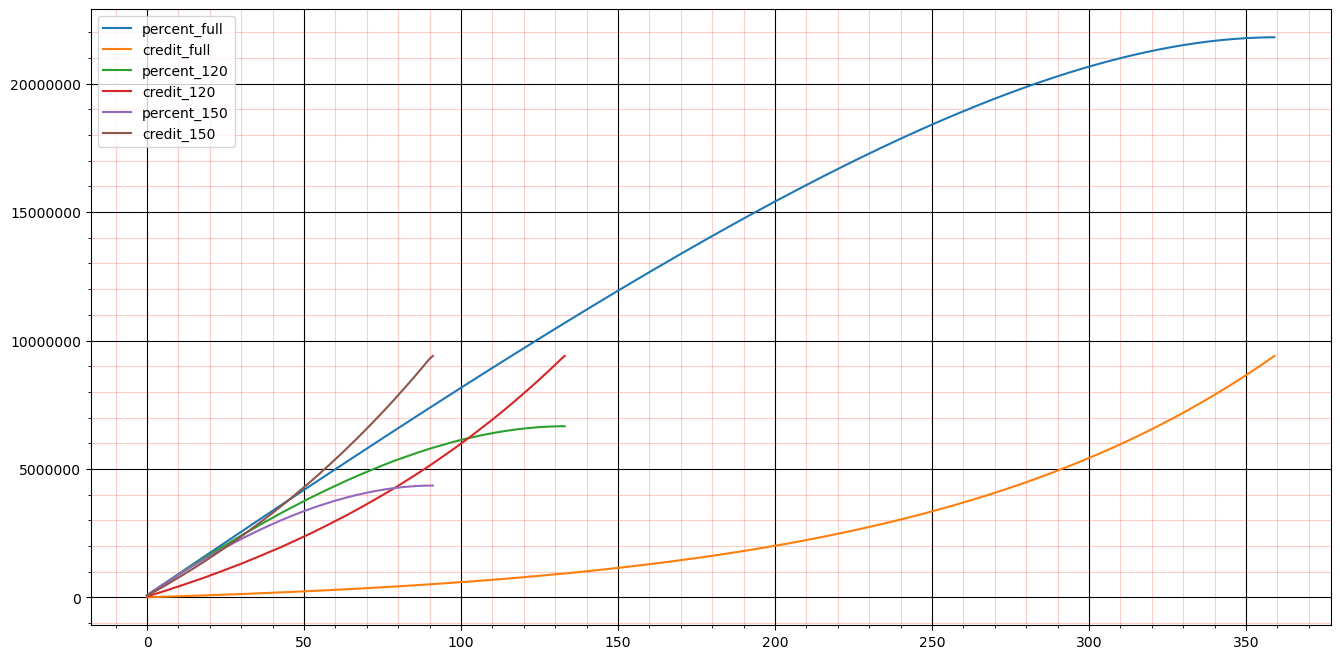

In [108]:
plt.figure(figsize=(16, 8))
plt.ticklabel_format(style = 'plain')
plt.plot(x_date.index, percent_full)
plt.plot(x_date.index, credit_full)
plt.plot(percent_120.index, percent_120)
plt.plot(credit_120.index, credit_120)
plt.plot(percent_150.index, percent_150)
plt.plot(credit_150.index, credit_150)
plt.legend(['percent_full','credit_full','percent_120','credit_120','percent_150','credit_150'])
plt.grid(visible=True, which='major', color='k', linestyle='-')
plt.grid(visible=True, which='minor', color='r', linestyle='-', alpha=0.2)
plt.minorticks_on()